number of texts : 3063
number of labels:  3063
Found 42963 unique words: 
Data shape consistent: True
The number of training 2144, validation 919
Training data shape: (2144, 7109)
Validation data shape: (919, 7109)


Epoch 1/10
29/29 [==============================] - 12s 329ms/step - loss: 0.5467 - acc: 0.8525 - val_loss: 0.4221 - val_acc: 0.8578
Epoch 2/10
29/29 [==============================] - 10s 347ms/step - loss: 0.3432 - acc: 0.8706 - val_loss: 0.2833 - val_acc: 0.8718
Epoch 3/10
29/29 [==============================] - 11s 382ms/step - loss: 0.1792 - acc: 0.9289 - val_loss: 0.1235 - val_acc: 0.9697
Epoch 4/10
29/29 [==============================] - 10s 343ms/step - loss: 0.0784 - acc: 0.9889 - val_loss: 0.0889 - val_acc: 0.9814
Epoch 5/10
29/29 [==============================] - 10s 341ms/step - loss: 0.0484 - acc: 0.9942 - val_loss: 0.0710 - val_acc: 0.9837
Epoch 6/10
29/29 [==============================] - 9s 322ms/step - loss: 0.0291 - acc: 0.9965 - val_loss: 0.0641 - val_acc: 0.9767
Epoch 7/10
29/29 [==============================] - 9s 313ms/step - loss: 0.0216 - acc: 0.9971 - val_loss: 0.0567 - val_acc: 0.9837
Epoch 8/10
29/29 [==============================] - 9s 313ms/step - los

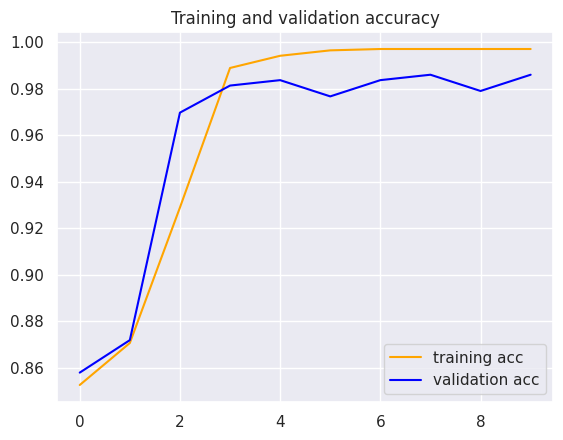

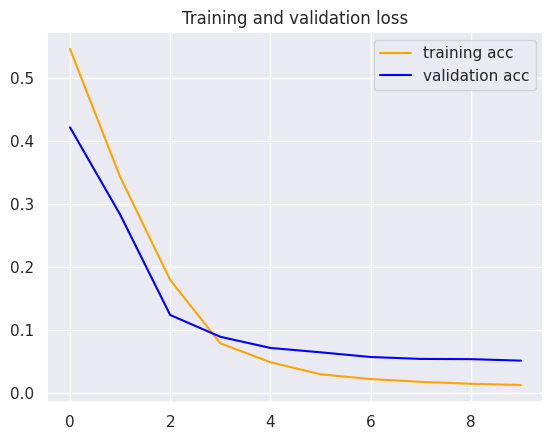

29/29 [==============================] - 2s 77ms/step
Test loss is 0.07 accuracy is 0.98
[[795  17]
 [  3 104]]


In [7]:
from tensorflow.keras import datasets, layers, models, optimizers
from keras.layers import SimpleRNN, Embedding, Dense, LSTM, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import chardet
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

with open("/content/Spam_Ham_data(1).csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv("/content/Spam_Ham_data(1).csv", encoding=encoding)

texts = []
labels = []
for i, label in enumerate(df['label']):
    texts.append(df['content'][i])
    if label == 0:
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))



# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)

maxlen = 7109
# Assuming you have 'texts' and 'labels' defined somewhere
training_samples = int(len(texts) * 0.7)
validation_samples = len(texts) - training_samples

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

np.random.seed(42)

# shuffle data
indices = np.random.permutation(len(data))
data = data[indices]
labels = labels[indices]

texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

print("Data shape consistent:", texts_train.shape[0] == y_train.shape[0] == training_samples)
print("The number of training {0}, validation {1}".format(training_samples, validation_samples))
print("Training data shape:", texts_train.shape)
print("Validation data shape:", texts_test.shape)

max_features = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.4)
model.compile(adam, loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

# Make predictions
y_pred = model.predict(texts_test)
y_pred_binary = (y_pred > 0.5).astype('int32')

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

print("Evaluate")
model.evaluate(texts_test, y_test, verbose=2)

acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Get predicted probabilities
pred = model.predict(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = model.predict(texts_test)
print("Test loss is {0:.2f} accuracy is {1:.2f}".format(acc[0], acc[1]))

# Convert predicted probabilities to binary predictions using a threshold
# Adjust the threshold as needed
threshold = 0.523
binary_pred = np.where(pred >= threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(binary_pred, y_test)
print(cm)

In [8]:
model.save('finallstmmodel.keras')